In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import hourglass_magnetic_field as hgm

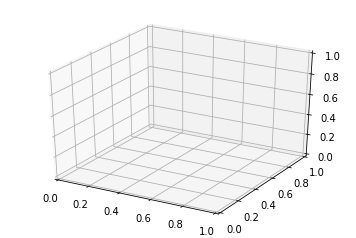

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [3]:


n_points = 100
scan = 1
spacing = 0.5

x_points, y_points, z_points = np.meshgrid(np.arange(-scan, scan, spacing),
                                           np.arange(-scan, scan, spacing),
                                           np.arange(-scan*10, scan*10, spacing/100))

# Model parameters.
h = 0.3257
k_array = [0.9549,0.4608,0.6320]
disk_radius = 3.8918
uniform_B0 = 3.3118

B_x, B_y, B_z = hgm.hourglass_magnetic_field_cart(x_points,y_points,z_points,h,k_array,disk_radius,uniform_B0)


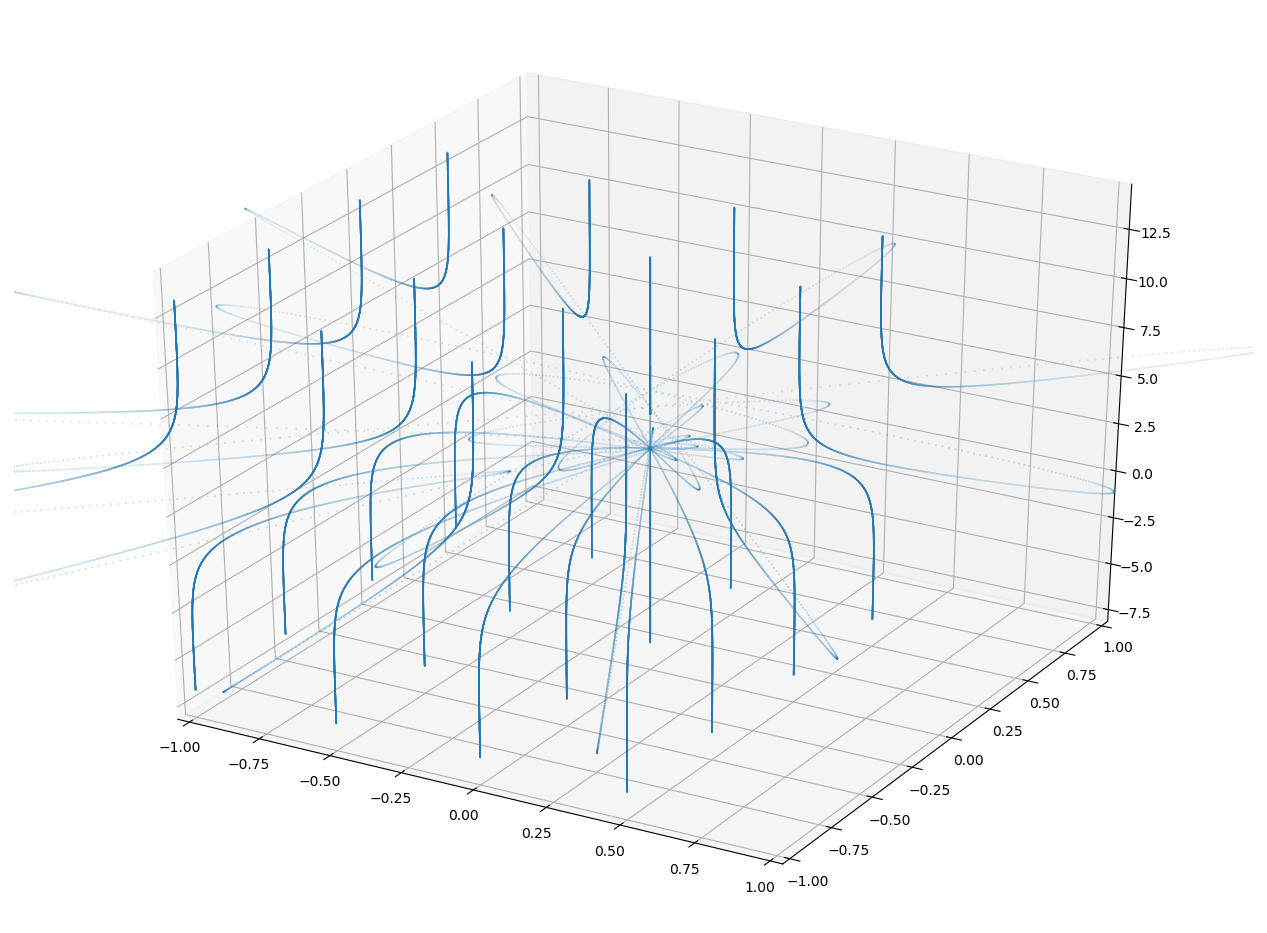

In [4]:
fig = plt.figure(figsize=(16,12),dpi=100)
ax = fig.gca(projection='3d')

quiver = False

if quiver:
    ax.quiver(x_points, y_points, z_points, B_x, B_y, B_z,length=0.1*scan,arrow_length_ratio=0.2,normalize=True)
    plt.show()
else:
    ax.scatter(np.ravel(x_points + B_x),
                np.ravel(y_points + B_y),
                np.ravel(z_points + B_z),
              s=0.1,
              marker='.')
    ax.set_xlim((-scan,scan))
    ax.set_ylim((-scan,scan))
    plt.show()

In [8]:
plt.plot()

(4, 4, 4000)
(4, 4, 4000)


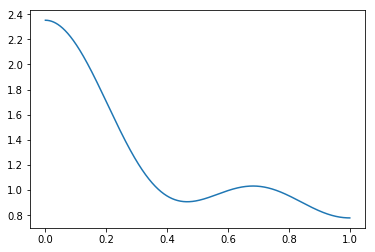

In [11]:
# Inital parameters
disk_radius = 3.8918
h = 0.3257
k_array = [0.9549,0.4608,0.6320]
uniform_B0 = 3.3118

r = np.linspace(0,1,10000) * disk_radius
z = 0

pltB_z = hgm.Ewer_Basu__B_z(r, z, h, k_array, disk_radius, uniform_B0)

plt.plot(r/disk_radius,pltB_z/uniform_B0)
plt.show()

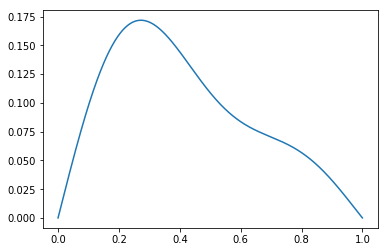

In [14]:
# Inital parameters 
disk_radius = 3.8918
k_array = [0.9549,0.4608,0.6320]
h = 0.3257
uniform_B0 = 3.3118

z = np.array(0.26 * disk_radius)
r = np.linspace(0,1,10000) * disk_radius

pltB_r = hgm.Ewer_Basu__B_r(r, z, h, k_array, disk_radius)

plt.plot(r/disk_radius,pltB_r/uniform_B0)
plt.show()